# Machine Learning for Remote Sensing and GIS (GEOG-790-S3)
#### Course Instructor: Dr. Maitiniyazi Maimaitijiang, Department of Geography & Geospatial Sciences, SDSU

## ML parameter tuning applicastions in Regression Problems

## Learning Objectives:

* Understand dimension reduction, data normalization and be able to actually implment in realworld cases.
* Understand different parameters of classical ML algorithms, be able to actually implment parameter tuning in realworld cases.

## 1. Import Lib

In [1]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import cv2
import rasterio
from matplotlib import pyplot as plt


## 2. Load data, feature scalling and dimension reduction

### 2.1 Load data

In [2]:
# Read data (Lab_4_data)
file = r'D:\Teaching\2022Spring\ML_RS_GIS\labs\Lab_5\data\1_regression_parameter_tuning\LCC_data.xlsx'
df = pd.read_excel(file,sheet_name = 'Sheet1')
df


,Plot_ID,LCC,350,351,352,353,354,355,356,357,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,M312,28.8,15.860227,9.774000,13.175862,13.428761,8.958094,13.098701,16.494692,15.920308,...,45.282684,40.607319,24.261955,14.021358,18.021902,21.902067,24.700001,27.497932,17.583925,6.255947
1,M015,30.8,9.529243,7.463000,9.941740,13.112441,17.321108,17.430378,18.501591,22.880409,...,2.503524,3.889073,6.403220,9.456512,13.767517,17.349646,14.379000,11.408355,8.270518,5.114084
2,M108,31.3,11.272360,7.143000,13.839225,15.791698,10.628365,11.283675,12.128814,11.908186,...,30.656300,33.531658,35.478973,35.828629,32.451283,28.807692,22.770500,16.733309,27.062237,39.211597
3,M134,32.1,22.599764,26.316000,28.736614,22.606449,3.649782,16.704529,26.689041,21.208958,...,3.196046,3.158223,2.808670,2.573274,2.604184,2.701835,3.399500,4.097165,4.098688,4.022777
4,M239,32.7,17.810272,23.684000,24.739620,21.312262,11.160262,11.154676,13.389713,18.222286,...,13.011713,15.151894,21.925680,29.189375,37.595924,44.133724,33.870998,23.608274,14.583553,5.696539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,M383,66.6,31.363003,32.353001,25.213654,25.507263,36.950600,27.642174,19.400814,19.030186,...,28.915920,26.213753,16.141254,10.881922,16.850691,23.692532,38.383499,53.074471,51.322460,47.741470
389,M361,66.7,9.497987,6.098000,12.117977,15.296140,14.211473,17.888584,20.399136,18.952864,...,33.461838,26.506557,23.519674,20.878263,19.042767,17.198421,15.274500,13.350580,9.290789,4.993420
390,M157,67.3,8.923623,8.333000,10.789865,11.841606,10.785606,11.355556,10.979148,7.972852,...,3.510967,3.933089,7.877268,11.460288,14.200804,16.515320,15.000000,13.484680,9.394204,5.017289
391,M107,67.8,17.172911,26.471001,22.622265,19.672209,18.070210,20.243788,20.509165,15.342836,...,2.859045,6.671537,14.132611,17.202238,10.027534,3.577051,3.637500,3.697949,11.813526,20.825090


In [3]:
# Get X and y
X = df.loc[:,451:2001].values
y = df['LCC'].values
print(X.shape)
print(y.shape)


(393, 1551)
(393,)


### 2.2 Feature Scaling or Data/feature normalization
Feature scaling means transforming the features in a way so that the values of each feature looses the influence of their units. For example, if we had an input dataset where there were two independent variables named area (in sq. m) and price (in USD), then we have to scale them in a way so that the model does not get weighted too much by just one variable. For this reflectance dataset, the values from all the features are actually reflectance which share similar unit (they are basically unitless since they are just percentages). So we dont have to necessarily scale the data but there could be outliers so we should consider scaling. We will do a min max scaling where every feature will have a data range from 0 to 1. We could also do Standard Scaling where the values will be converted to the z score.
Reference link: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

#### 2.2.1 Method-1: Min Max Scaler

In [4]:
# Import the module
from sklearn.preprocessing import MinMaxScaler

# Define the scaling object
scaler = MinMaxScaler()

# Fit the scaler to X
scaler.fit(X)

#  Transform the original X to scaled/normalized X
X_scaled = scaler.transform(X)
print(X_scaled)


[[0.1510634  0.1568557  0.15838586 ... 0.51980829 0.49913469 0.48053435]
 [0.17820042 0.17481126 0.16683505 ... 0.3840164  0.40023276 0.41902413]
 [0.24423312 0.2450269  0.2623907  ... 0.35509537 0.35766843 0.36411536]
 ...
 [0.08542824 0.09134056 0.08737097 ... 0.14965345 0.1786433  0.21389538]
 [0.21613367 0.22662626 0.24071783 ... 0.23162486 0.25618524 0.28571626]
 [0.34298927 0.34671827 0.33517942 ... 0.24386068 0.24105385 0.24450506]]


#### 2.2.2 Method-2: Standard Scaler

In [ ]:
# Import the module
from sklearn.preprocessing import StandardScaler


# Define the scaling object


# Fit the scaler to X


# Transform the original X to scaled/normalized X




### 2.3 Dimension Reduction
See that our independent feature space is quite large. There is a rule of thumb that if the sample size is less than the number of features, the model may underperform or overperform. Therefore, often we may need to reduce the dimensions (or feature space) using different techniques. Here we will use Principal Component Analysis (PCA) to reduce the dimensions.

In [5]:
# Import the module
from sklearn.decomposition import PCA
# User define number of PCs
X = X_scaled 
n_components = min(X.shape) # you can also provide a specific number

# Define the pca object
pca = PCA(n_components = 5)

# Fit the pca to X
pca.fit(X)

# Transform the original X to PCs
X_pca = pca.transform(X)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


[0.71224932 0.14743455 0.08778371 0.01713582 0.0078091 ]


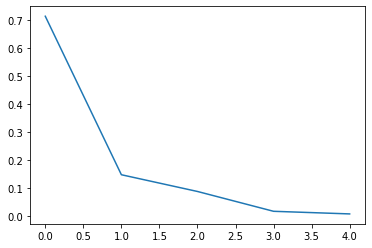

In [6]:
# Display the explained variance ratio
plt.plot(pca.explained_variance_ratio_) 

## 3. ML Model Training and Testing

### 3.1 Training and testing sets split

In [7]:
# Split the 393 data samples ramdonly into traing and testing sets (70%:30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=0)

print(X.shape)
print(X_pca.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(393, 1551)
(393, 5)
(393,)
(275, 5)
(275,)
(118, 5)
(118,)


### Before Model Buidling
* Train the following regression algorithms with hyperparameter tuning. Use the following table for the suggestion of hyperparamters and use 5 as cross validation:

| Model Name                   | Hyperparameter | Suggested values                              |
|------------------------------|----------------|-----------------------------------------------|
|1.Support Vector Machine(SVM) | kernel         | rbf, linear, poly                             |
|                              | C              | 2^-5 to 2^10 where the power increases with 1 |
|                              | gamma          | 1, 0.1, 0.01, 0.001, 0.0001                   |
|
|
|2.Partial Least Squares (PLS)  |n_components   | Try 1, 2, 3,...., maximum number of features  |
|
|
|
|3.Decision Tree (DT)           | criterion      | gini, entropy                                |
|                                | max_features   | auto, sqrt, log2, None                      |
|
|
|
|4.Random Forests (RF)         | n_estimators   | 50,100,150,200, .....,1000                    |
|                              | criterion      | gini, entropy                                 |
|                              | max_features   | auto, sqrt, log2                              |




### 3.2 Apply Support Vector Regression (SVR) to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [8]:
# Import modules
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [9]:
model_SVR = SVR() # define a model with defalt parameter settings

# User define parameter ranges
kernal = ['linear', 'rbf','poly']
C = [0.125, 0.25, 0.5, 1.0, 2.0, 4.0]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]

# Define the parameter search space with different values for hyperparameters
# It has to be a dictionary, where the keys are the hyperparametr names (in string)
# and the values are the options. The values can be either list of np array.
parameters = {'kernel': kernal,
              'C': C,
              'gamma': gamma}


* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [10]:
# Define the grid search object
grid = GridSearchCV(estimator = model_SVR,
                    param_grid=parameters,
                    cv = 5,
                    n_jobs=-1) # -1 will ensure that all the cores of the processor is being used in parallel mode
# Fit the grid using train set
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.125, 0.25, 0.5, 1.0, 2.0, 4.0],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'poly']})

In [11]:
# Get the cross validation results
grid.cv_results_


{'mean_fit_time': array([1.33637905e-02, 1.17682457e-02, 6.27666197e+00, 6.99567795e-03,
        5.58514595e-03, 8.17809105e-03, 6.98122978e-03, 1.87496662e-02,
        1.87493801e-02, 1.77524090e-02, 1.23665333e-02, 1.71538353e-02,
        1.55581474e-02, 1.61566734e-02, 2.07440853e-02, 2.99200058e-02,
        1.75527096e-02, 2.33183945e+01, 2.75259972e-02, 3.23134899e-02,
        3.78983498e-02, 4.78718758e-02, 2.65287399e-02, 2.75261402e-02,
        8.37755203e-03, 2.41350651e-02, 6.44273758e-02, 3.80976200e-02,
        6.38265610e-03, 4.18858528e-03, 5.96404076e-02, 2.79251099e-02,
        3.86799469e+01, 3.44987869e-02, 2.94824600e-02, 6.78182602e-02,
        7.37986565e-03, 2.74358273e-02, 3.68594170e-02, 7.12570667e-02,
        4.03328896e-02, 6.16703033e-03, 4.94904995e-02, 3.75769138e-02,
        4.01664734e-02, 5.71452618e-02, 3.81242752e-02, 9.84620943e+01,
        3.88958931e-02, 3.67014408e-02, 1.20278072e-01, 8.17809105e-03,
        3.39093208e-02, 3.33106995e-02, 3.86965

In [13]:
# Since the cross validation resutls is a dictionary and hard to read, so, convert that to a pandas datafram
import pandas as pd

cv_results = pd.DataFrame(grid.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013364,1.382823e-02,0.001197,3.989697e-04,0.125,1,linear,"{'C': 0.125, 'gamma': 1, 'kernel': 'linear'}",0.521634,0.422916,0.349951,0.345983,-0.351821,0.257733,0.311377,7
1,0.011768,7.709824e-03,0.003989,1.545172e-03,0.125,1,rbf,"{'C': 0.125, 'gamma': 1, 'kernel': 'rbf'}",0.005654,0.022023,-0.004225,0.021362,0.021379,0.013238,0.010695,53
2,6.276662,2.633495e+00,0.001596,4.884609e-04,0.125,1,poly,"{'C': 0.125, 'gamma': 1, 'kernel': 'poly'}",-0.143876,0.326324,-1.111783,-4.207476,-424.829819,-85.993326,169.425607,90
3,0.006996,1.573168e-03,0.001197,7.464804e-04,0.125,0.1,linear,"{'C': 0.125, 'gamma': 0.1, 'kernel': 'linear'}",0.521634,0.422916,0.349951,0.345983,-0.351821,0.257733,0.311377,7
4,0.005585,4.885778e-04,0.003087,1.894475e-04,0.125,0.1,rbf,"{'C': 0.125, 'gamma': 0.1, 'kernel': 'rbf'}",0.095703,0.096050,0.059748,0.094421,0.060138,0.081212,0.017375,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.006582,2.239322e-03,0.003590,4.885193e-04,4.0,0.001,rbf,"{'C': 4.0, 'gamma': 0.001, 'kernel': 'rbf'}",0.185848,0.128911,0.114515,0.136736,0.078016,0.128805,0.034930,42
86,0.040891,7.033008e-02,0.001995,1.545388e-03,4.0,0.001,poly,"{'C': 4.0, 'gamma': 0.001, 'kernel': 'poly'}",-0.013247,-0.000812,-0.024433,-0.000481,0.001233,-0.007548,0.009899,66
87,0.015558,2.720138e-03,0.000997,1.784161e-07,4.0,0.0001,linear,"{'C': 4.0, 'gamma': 0.0001, 'kernel': 'linear'}",0.483979,0.581302,0.473174,0.408303,-1.174757,0.154400,0.666875,35
88,0.004987,2.431402e-07,0.003192,3.989458e-04,4.0,0.0001,rbf,"{'C': 4.0, 'gamma': 0.0001, 'kernel': 'rbf'}",0.019385,0.023907,0.001643,0.025888,0.018078,0.017780,0.008560,52


In [19]:
# print best parameter
print(grid.best_params_)

{'C': 4.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [20]:
# Get the best model
best_model = grid.best_estimator_


MSE: 32.51839127364307
RMSE: 5.702489918767333
R2: 0.5012197797484883


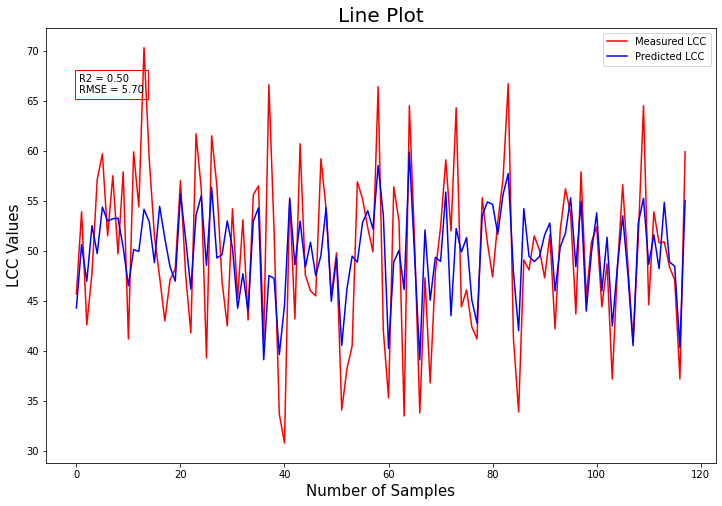

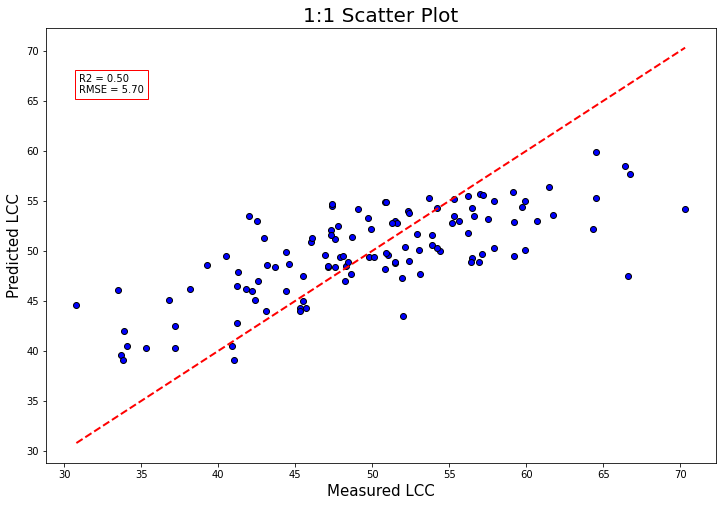

In [22]:
# Evaluate model using testing dataset
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model.predict(X_test)

MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt (MSE)
R2 = r2_score(y_test,y_pred)

print("MSE: " + str(MSE))
print("RMSE: " + str(RMSE))
print("R2: " + str(R2))

# Line plot of predicted and actural measured values
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(y_test,color = 'r',label='Measured LCC')
ax.plot(y_pred,color = 'b',label='Predicted LCC')
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction',color='black', fontsize=10,bbox=dict(facecolor='none',edgecolor='red'))
ax.set_xlabel('Number of Samples',fontsize = 15)
ax.set_ylabel('LCC Values',fontsize = 15)
ax.set_title("Line Plot",fontsize = 20)
plt.legend()
plt.show()

# Scatter plot of predicted and actural measured values
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(y_test,y_pred, color = 'b', edgecolors = (0,0,0))
ax.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--',lw=2)
text = r"R2 = %.2f" % (R2);text += "\n"; text += r"RMSE = %.2f" % (RMSE)   
plt.annotate(text, xy=(0.05, 0.85), xycoords='axes fraction',color='black', fontsize=10,bbox=dict(facecolor='none',edgecolor='red'))
ax.set_xlabel('Measured LCC',fontsize = 15)
ax.set_ylabel('Predicted LCC',fontsize = 15)
ax.set_title("1:1 Scatter Plot",fontsize = 20)
plt.show()


### 3.4 Apply Partial Least Squares Regression to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html

### 3.3 Apply Decision Tree-based regression to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 3.5 Apply Random Forest Regression to predict LCC through parameter tuning
* Important link: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html